#### Importamos las bibliotecas necesarias

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

#### Leemos los datos históricos de BTC desde un archivo CSV 

In [421]:
ruta_archivo = r"C:\Users\SILCA\OneDrive\Escritorio\dataset\BTC_USD1.csv"
df = pd.read_csv(ruta_archivo)

print (df.head())

        Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  Precio_Cierre  \
0  31/12/2015            426.0          433.0          419.0          431.0   
1   1/01/2016            431.0          436.0          428.0          434.0   
2   2/01/2016            435.0          436.0          432.0          433.0   
3   3/01/2016            434.0          434.0          425.0          430.0   
4   4/01/2016            430.0          435.0          429.0          433.0   

    Volumen  
0  45996600  
1  36278900  
2  30096600  
3  39633800  
4  38477500  


leemos los datos del archivo CSV, calculamos la variabilidad como la diferencia entre el precio_cierre y el precio_Apertura, determinamos asi cuanto vario en dolares el precio por dia  y creamos 1 nueva columna

In [422]:
import pandas as pd

ruta_archivo = r"C:\Users\SILCA\OneDrive\Escritorio\dataset\BTC_USD1.csv"
df = pd.read_csv(ruta_archivo)
df = df.iloc[::-1]  
df['Variabilidad'] = df['Precio_Cierre'] - df['Precio_Apertura']
df = df.iloc[::-1]
print(df)


           Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  \
0     31/12/2015          426.000        433.000        419.000   
1      1/01/2016          431.000        436.000        428.000   
2      2/01/2016          435.000        436.000        432.000   
3      3/01/2016          434.000        434.000        425.000   
4      4/01/2016          430.000        435.000        429.000   
...          ...              ...            ...            ...   
2938  16/01/2024           42.499         43.566         42.086   
2939  17/01/2024           43.132         43.190         42.189   
2940  18/01/2024           42.742         42.876         40.631   
2941  19/01/2024           41.278         42.134         40.297   
2942  21/01/2024           41.671         41.693         41.615   

      Precio_Cierre      Volumen  Variabilidad  
0           431.000     45996600         5.000  
1           434.000     36278900         3.000  
2           433.000     30096600        -2.000  

Creamos una nueva columna llamada Precio_Promedio, la misma contiene una resta del Precio_Cierre con respecto al Precio_Apertura, que de como resultado 1 si el precio subió y 0 si bajó.

In [423]:
import pandas as pd
df['Precio_Promedio'] = df['Precio_Cierre'] - df['Precio_Apertura']
df['Precio_Promedio'] = df['Precio_Promedio'].apply(lambda x: 1 if x > 0 else 0)
print(df[['Fecha', 'Precio_Cierre', 'Precio_Apertura', 'Precio_Promedio']].head())


        Fecha  Precio_Cierre  Precio_Apertura  Precio_Promedio
0  31/12/2015          431.0            426.0                1
1   1/01/2016          434.0            431.0                1
2   2/01/2016          433.0            435.0                0
3   3/01/2016          430.0            434.0                0
4   4/01/2016          433.0            430.0                1


Eliminamos valores NAN

In [424]:
df = df.fillna(0)  


Guardamos en un archivo csv el nuevo dataframe modificado con el que vamos a trabajar, luego lo imprimimos para verificar

In [425]:
df.to_csv('mi_dataframe_BTC.csv', index=False)


In [426]:
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')


In [427]:
print(df_cargado)


           Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  \
0     31/12/2015          426.000        433.000        419.000   
1      1/01/2016          431.000        436.000        428.000   
2      2/01/2016          435.000        436.000        432.000   
3      3/01/2016          434.000        434.000        425.000   
4      4/01/2016          430.000        435.000        429.000   
...          ...              ...            ...            ...   
2938  16/01/2024           42.499         43.566         42.086   
2939  17/01/2024           43.132         43.190         42.189   
2940  18/01/2024           42.742         42.876         40.631   
2941  19/01/2024           41.278         42.134         40.297   
2942  21/01/2024           41.671         41.693         41.615   

      Precio_Cierre      Volumen  Variabilidad  Precio_Promedio  
0           431.000     45996600         5.000                1  
1           434.000     36278900         3.000                1

#### verificamos la estructura del dataframe

In [428]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            2943 non-null   object 
 1   Precio_Apertura  2943 non-null   float64
 2   Precio_Máximo    2943 non-null   float64
 3   Precio_Mínimo    2943 non-null   float64
 4   Precio_Cierre    2943 non-null   float64
 5   Volumen          2943 non-null   int64  
 6   Variabilidad     2943 non-null   float64
 7   Precio_Promedio  2943 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 184.1+ KB
None



#### Realizamos una descipcion estadistica basica de las distintas variables del set de datos 
* cantidad 
* media 
* devio standard 
* valor minimo 
* primer cuartil 
* segundo cuartil 
* tercer cuartil 
* valor maximo


#### creamos un grafico de barra para mostrar la variabilidad mensual promedio de los 8 años

Mes
1    -0.189250
2    -3.968854
3    -0.052133
4     0.086375
5     0.244895
6     0.488154
7    -0.145190
8    -0.207565
9     0.131454
10    0.491742
11    0.156250
12    0.902333
Name: Variabilidad, dtype: float64


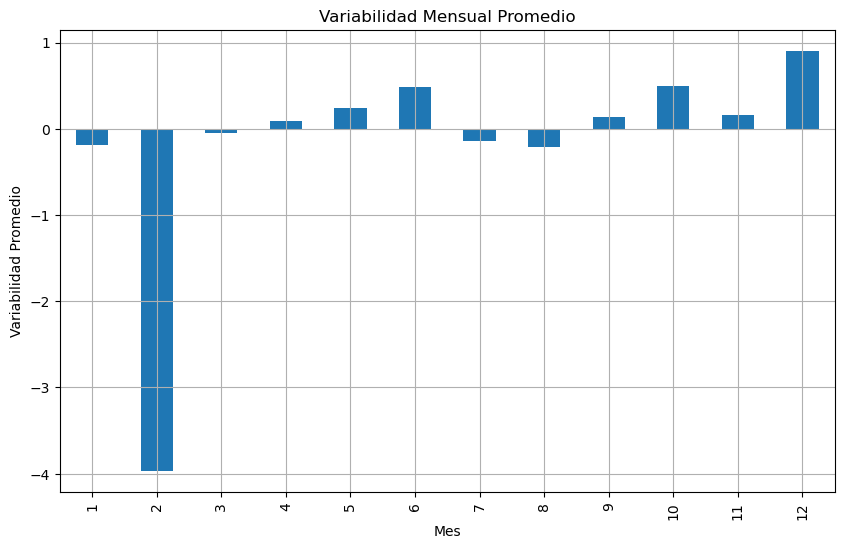

In [429]:
import pandas as pd
import matplotlib.pyplot as plt
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')
df_cargado['Fecha'] = pd.to_datetime(df_cargado['Fecha'], format='%d/%m/%Y')
variabilidad_mensual = df_cargado.groupby(df_cargado['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual.index = variabilidad_mensual.index.set_names(['Mes'])
print(variabilidad_mensual)
variabilidad_mensual.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio')
plt.grid(True)
plt.show()


Realizamos un grafico de barra para la variabilidad mensual del año 2020, teniendo en cuenta que es un año de halving 

C:\Users\SILCA\AppData\Local\Temp\ipykernel_14796\459775877.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Variabilidad'] = df_2020['Precio_Máximo'] - df_2020['Precio_Mínimo']


Mes
1     0.287323
2     0.317759
3     0.563323
4     0.307033
5     0.402323
6     0.264567
7     0.238097
8     0.374355
9     0.375000
10    0.370806
11    0.881833
12    1.125226
Name: Variabilidad, dtype: float64


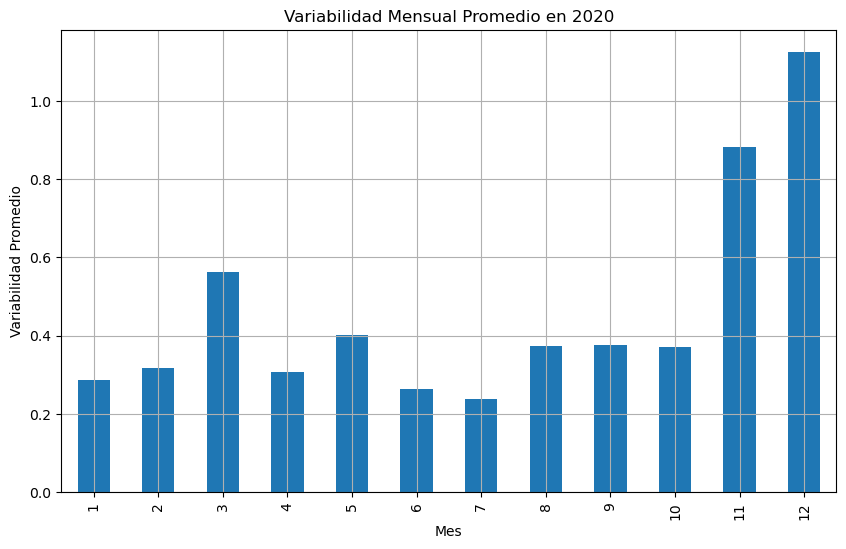

In [430]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya has cargado tu DataFrame
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')

# Convertir la columna 'Fecha' a formato datetime
df_cargado['Fecha'] = pd.to_datetime(df_cargado['Fecha'], format='%d/%m/%Y')

# Filtrar los datos para el año 2020
df_2020 = df_cargado[df_cargado['Fecha'].dt.year == 2020]

# Calcular la variabilidad como la diferencia entre el precio máximo y el precio mínimo
df_2020['Variabilidad'] = df_2020['Precio_Máximo'] - df_2020['Precio_Mínimo']

# Agrupar por mes y calcular la variabilidad mensual promedio
variabilidad_mensual_2020 = df_2020.groupby(df_2020['Fecha'].dt.month)['Variabilidad'].mean()

# Ajustar los nombres de los índices
variabilidad_mensual_2020.index = variabilidad_mensual_2020.index.set_names(['Mes'])
print(variabilidad_mensual_2020)

# Crear el gráfico de barras
variabilidad_mensual_2020.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2020')
plt.grid(True)
plt.show()


Realizamos un grafico de barra para la variabilidad mensual del año 2021, teniendo en cuenta que es un año de posthalving 

Mes
1     0.108613
2     0.431714
3     0.453355
4    -0.044667
5    -0.662452
6    -0.075400
7     0.210806
8     0.192871
9    -0.102100
10    0.567194
11   -0.236033
12   -0.407194
Name: Variabilidad, dtype: float64


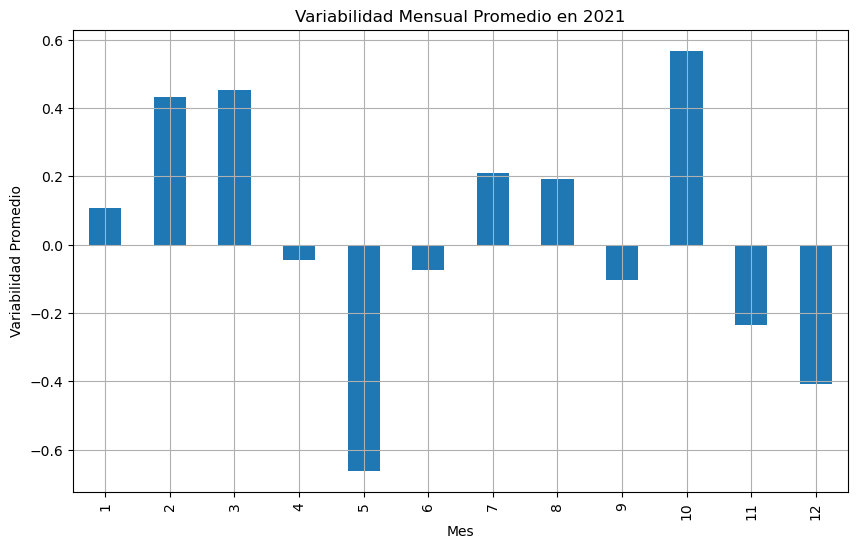

In [451]:
import pandas as pd
import matplotlib.pyplot as plt
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')
df_cargado['Fecha'] = pd.to_datetime(df_cargado['Fecha'], format='%d/%m/%Y')
df_2021 = df_cargado[df_cargado['Fecha'].dt.year == 2021]
variabilidad_mensual_2021 = df_2021.groupby(df_2021['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2021.index = variabilidad_mensual_2021.index.set_names(['Mes'])
print(variabilidad_mensual_2021)
variabilidad_mensual_2021.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2021')
plt.grid(True)
plt.show()


Realizamos un grafico de barra para la variabilidad mensual del año 2016, teniendo en cuenta que es un año de halving 

Mes
1     0.070516
2    -0.025586
3    -0.072548
4     0.073900
5     0.025484
6    -0.010500
7     0.070419
8     0.013194
9    -0.029467
10    0.095581
11    0.195567
12    0.302581
Name: Variabilidad, dtype: float64


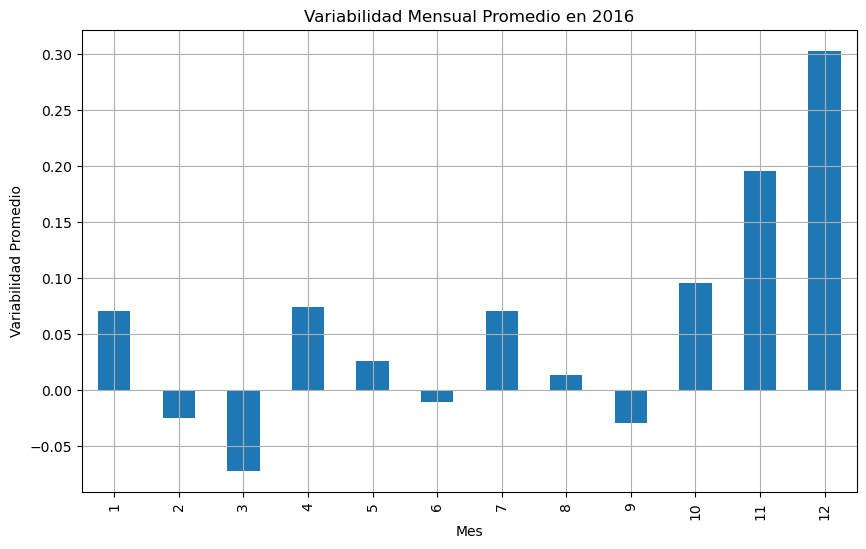

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')
df_cargado['Fecha'] = pd.to_datetime(df_cargado['Fecha'], format='%d/%m/%Y')
df_2016 = df_cargado[df_cargado['Fecha'].dt.year == 2020]
variabilidad_mensual_2016 = df_2016.groupby(df_2016['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2016.index = variabilidad_mensual_2016.index.set_names(['Mes'])
print(variabilidad_mensual_2016)
variabilidad_mensual_2016.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2016')
plt.grid(True)
plt.show()


Realizamos un grafico de barra para la variabilidad mensual del año 2017, teniendo en cuenta que es un año de posthalving 

Mes
1      0.483774
2    -34.779786
3     -0.261516
4      0.008967
5      0.029645
6      0.005733
7      0.010065
8      0.061323
9     -0.012433
10     0.068613
11     0.127500
12     0.119129
Name: Variabilidad, dtype: float64


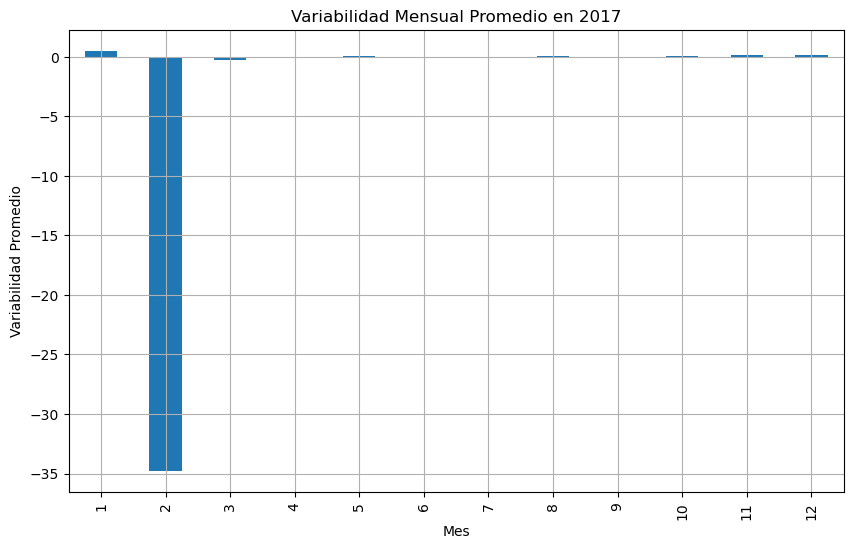

In [452]:
import pandas as pd
import matplotlib.pyplot as plt
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')
df_cargado['Fecha'] = pd.to_datetime(df_cargado['Fecha'], format='%d/%m/%Y')
df_2017 = df_cargado[df_cargado['Fecha'].dt.year == 2017]
variabilidad_mensual_2017 = df_2017.groupby(df_2017['Fecha'].dt.month)['Variabilidad'].mean()
variabilidad_mensual_2017.index = variabilidad_mensual_2017.index.set_names(['Mes'])
print(variabilidad_mensual_2017)
variabilidad_mensual_2017.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Variabilidad Promedio')
plt.title('Variabilidad Mensual Promedio en 2017')
plt.grid(True)
plt.show()


Dividimos los datos para el entrenamiento

In [431]:
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')

In [432]:
X = df['Precio_Cierre'].values.reshape(-1, 1)
y = df['Precio_Apertura'].values  


#### Dividimos en conjuntos de entrenamiento y prueba 
El 20% de los datos se utilizará como conjunto de prueba (test_size=0.2) y el 80% de los datos para entrenamiento

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Creamos una instancia del modelo, elejimos el algoritmo de regresion lineal

In [434]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#### Entrenamos el modelo

In [435]:
model.fit(X_train, y_train)



LinearRegression()

#### Realizamos predicciones en los datos de prueba

In [436]:

y_pred = model.predict(X_test)



####  importamos las funciones necesarias para calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R²).

In [437]:
from sklearn.metrics import mean_squared_error, r2_score



#### Evalúamos el rendimiento del modelo
El Error Cuadrático Medio (MSE) mide la diferencia entre las predicciones del modelo y los valores reales. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.

In [438]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#### El Coeficiente de Determinación (R²) indica cuánta varianza en la variable objetivo se explica por el modelo. 
Un valor cercano a 1 significa que el modelo se ajusta bien a los datos.

In [439]:
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R2): {r2:.2f}")


Error cuadrático medio (MSE): 6560.85
Coeficiente de determinación (R2): 0.87


El Error Cuadrático Medio (MSE):  6560.85
 El MSE mide la diferencia promedio al cuadrado entre los resultados observados reales y los resultados predictivos del  modelo. En este caso es bajo por lo tanto mi modelo de prediccion esta funcionando en base a esas variables.

El Coeficiente de Determinación (R²):  es 0.87
El R² indica la proporción de la varianza en la variable dependiente que se puede predecir a partir de las variables independientes. Un valor de 0.89  es un ajuste bueno-


#### Curvas de Aprendizaje 
La utilizamos Para evaluar el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento, podemos trazar la puntuación de entrenamiento y prueba en función del tamaño del conjunto de datos.

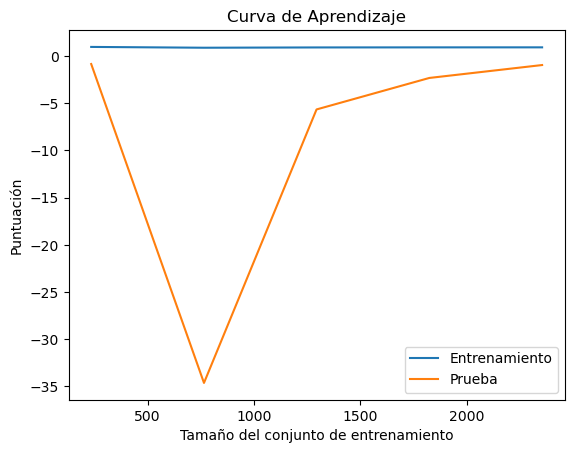

In [440]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Entrenamiento')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()

#### La Curva de Aprendizaje muestra cómo cambia el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento. 

* Entrenamiento :
 Esta línea muestra cómo se comporta el modelo en el conjunto de entrenamiento a medida que aumenta el tamaño del conjunto. Inicialmente, la puntuación es alta, pero luego disminuye. Esto puede indicar que el modelo está sobreajustando los datos de entrenamiento.
* Prueba:
Esta línea muestra cómo se comporta el modelo en un conjunto de datos de prueba independiente a medida que aumenta el tamaño del conjunto. Inicialmente, la puntuación es baja, pero luego mejora. Esto sugiere que el modelo generaliza mejor a medida que se le proporcionan más datos de prueba.
* Tamaño del conjunto de entrenamiento (eje horizontal):
 Representa el número de ejemplos de entrenamiento utilizados para entrenar un modelo. Comienza en 0 y aumenta hasta 2000.
* Puntuación (eje vertical):
 La puntuación generalmente se refiere al rendimiento del modelo. En este caso, parece estar en una escala negativa, lo que sugiere que se trata de una métrica de error. Cuanto más cerca de 0, mejor.


#### Histograma de Residuos 
Nos sirve para analizar la distribución de los residuos que es la diferencia entre los valores reales y las predicciones

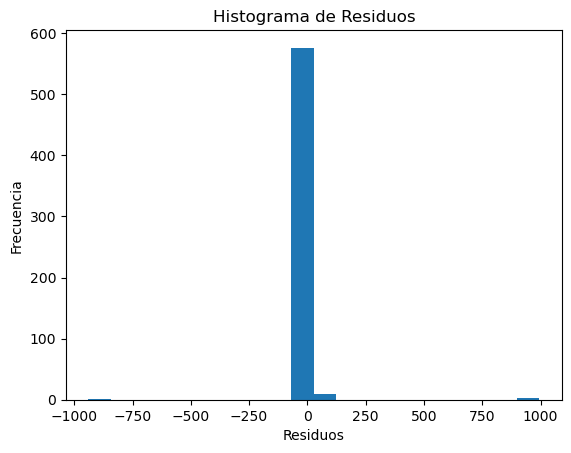

In [441]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()


La mayoría de los residuos están cerca de cero, lo que sugiere que el modelo está haciendo buenas predicciones en general. Encontramos que hay un valor atípico, en el extremo derecho del histograma, que es mucho más grande que los demás. Este valor atípico podría indicar un problema con un punto de datos específico o una característica inusual en los datos. 
* Eje X_Representa los valores de los residuos. Los residuos son las diferencias entre los valores reales y las predicciones del modelo.
* Eje Y_Muestra con qué frecuencia ocurre cada valor de residuo.

#### Grafico de Regresion Lineal
trazamos los valores reales frente a las predicciones, para tener una idea visual de cómo se ajusta el modelo a los datos.

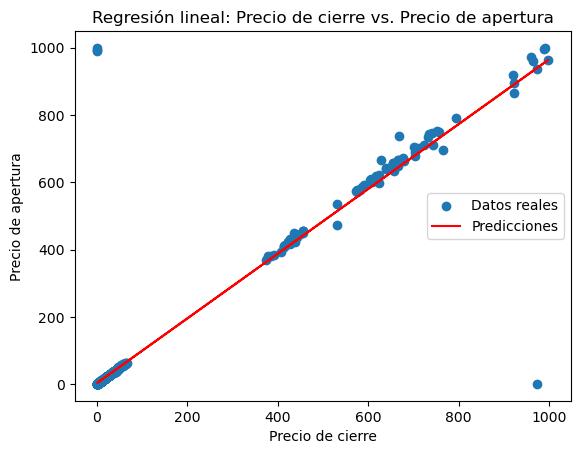

In [442]:
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Precio de cierre')
plt.ylabel('Precio de apertura')  
plt.title('Regresión lineal: Precio de cierre vs. Precio de apertura')
plt.legend()
plt.show()


#### En el gráfico, se comparan el volumen con el precio de cierre del modelo de fregrecion lineal.

Los puntos azules representan una combinación de volumen y precio de cierre real. Estos puntos están distribuidos en el gráfico según los datos reales del conjunto de prueba. La línea roja representa las predicciones del modelo de regresión lineal. Esta línea muestra cómo el modelo estima el volumen en función del precio de cierre. Si los puntos azules están cerca de esta línea, significa que el modelo está haciendo buenas predicciones. Si hay una gran dispersión entre los puntos y la línea, podría ser necesario investigar más o ajustar el modelo.
Parece haber una relación positiva entre el volumen y el precio de cierre. A medida que el volumen aumenta, también lo hace el precio de cierre.

#### Reemplazamos fecha_apertura por volumen, para ver si habia correlacion

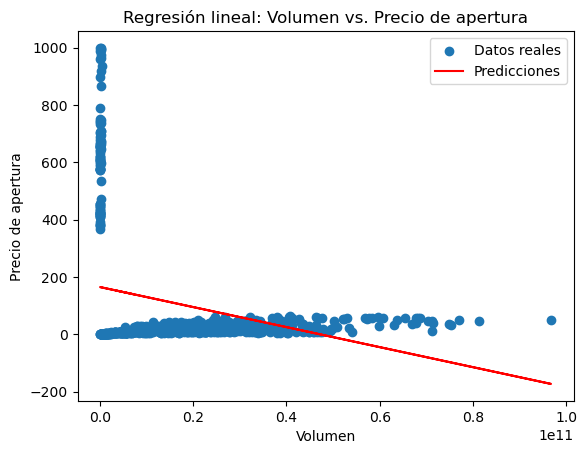

In [443]:


X = df['Volumen'].values.reshape(-1, 1)
y = df['Precio_Apertura'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Volumen')
plt.ylabel('Precio de apertura') 
plt.title('Regresión lineal: Volumen vs. Precio de apertura')
plt.legend()
plt.show()


##### En el gráfico, se comparan las predicciones del modelo de regresión lineal con los valores reales para la variable “Volumen” frente al “Precio de cierre”. 
Volumen: En el eje horizontal, tenemos el volumen de operaciones (compra y venta) de Bitcoin. Representa la cantidad total de BTC negociados en un período de tiempo específico.
Precio de apertura: En el eje vertical, tenemos el precio de apertura de Bitcoin en ese mismo período. Es el precio al que se iniciaron las operaciones en ese intervalo de tiempo.
Datos reales (puntos azules): Cada punto azul representa una observación real de volumen y precio de apertura. Estos datos provienen del histórico de operaciones de Bitcoin.
Línea de predicciones (línea roja): La línea roja es el resultado de aplicar un modelo de regresión lineal a los datos. Esta línea representa la relación estimada entre el volumen y el precio de apertura. En este caso, parece haber una correlación negativa: a medida que aumenta el volumen, el precio de apertura tiende a disminuir.

#### Grafica el precio de cierre a lo largo del tiempo

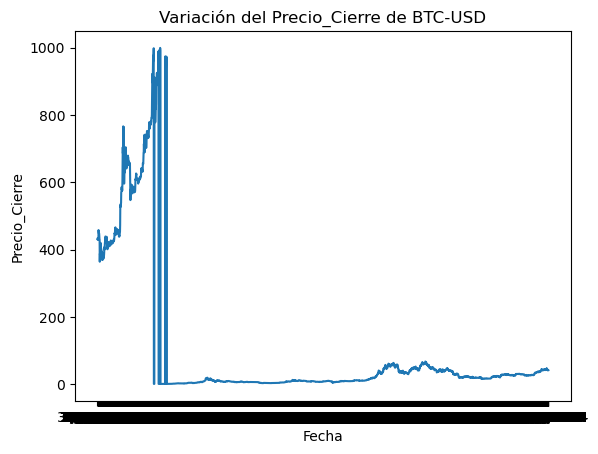

In [444]:
import matplotlib.pyplot as plt
plt.plot(df['Fecha'], df['Precio_Cierre'])
plt.xlabel('Fecha')
plt.ylabel('Precio_Cierre')
plt.title('Variación del Precio_Cierre de BTC-USD')
plt.show()


#### En el grafico se representa la variación del precio de cierre de Bitcoin (BTC-USD) a lo largo del tiempo.

Eje x=Fecha, la línea de tiempo se muestra en el eje horizontal. Cada punto en el gráfico corresponde a una fecha específica.
Eje y=Precio de cierre. el eje vertical muestra los valores del precio de cierre de BTC-USD. Los valores están en notación científica, lo que significa que el eje está escalado en potencias de diez (por ejemplo, 1e10 representa 10 mil millones).
Tendencia general, Se observan fluctuaciones significativas en el precio de cierre. Hay un aumento notable seguido de cierta volatilidad.
Interpretación: Este gráfico puede ser relevante para el análisis económico o para considerar inversiones en Bitcoin. Se puede ver cómo el precio ha cambiado con el tiempo y asi evaluar tendencias o patrones.

#### Determinamos ganancias mensuales por año
Calcula las ganancias mensuales (Precio Cierre - Precio Apertura)/Agrupamos por año y mes, y sumamos las ganancias/Desglosamos el índice de la agrupacióncion/creamos el grafico



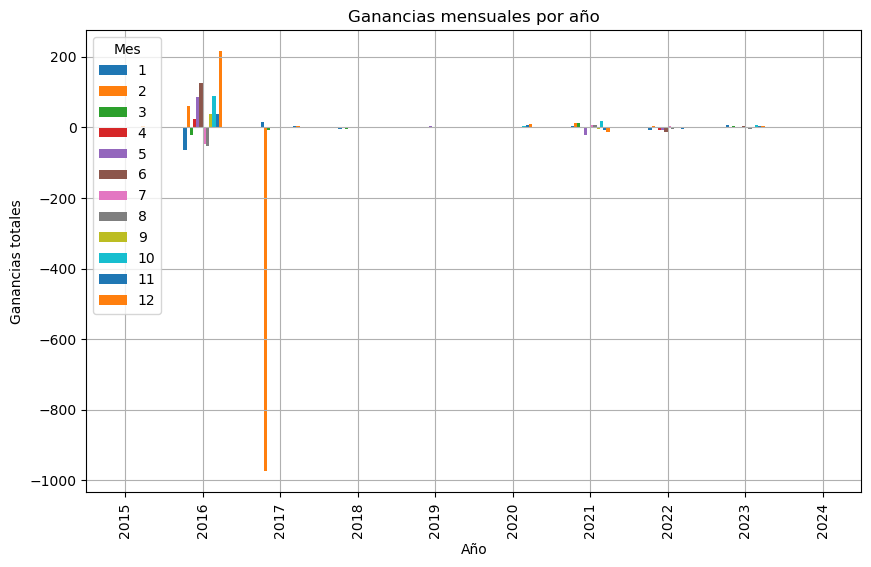

In [445]:
import pandas as pd
import matplotlib.pyplot as plt
df_cargado = pd.read_csv('mi_dataframe_BTC.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Ganancia'] = df['Precio_Cierre'] - df['Precio_Apertura']
ganancias_por_mes = df.groupby([df['Fecha'].dt.year, df['Fecha'].dt.month])['Ganancia'].sum()
ganancias_por_mes.index = ganancias_por_mes.index.set_names(['Año', 'Mes'])
ganancias_por_mes.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Ganancias totales')
plt.title('Ganancias mensuales por año')
plt.grid(True)
plt.legend(title='Mes', loc='upper left')
plt.show()


El gráfico muestra las ganancias mensuales por año desde 2015 hasta 2024. Aquí hay algunos puntos clave:

Variabilidad: Hay una notable variabilidad en las ganancias mensuales a lo largo de los años. Algunos años, como 2016 y 2017, muestran pérdidas significativas en varios meses.
Estabilidad: A partir de 2018, las ganancias parecen ser más estables, con menos fluctuaciones extremas.
Meses Destacados: Algunos meses, como enero y diciembre, parecen tener ganancias más consistentes en comparación con otros meses.
Tendencias Generales: Aunque hay fluctuaciones, parece haber una tendencia general de recuperación y estabilidad en las ganancias a partir de 2018.
Este análisis puede ayudarte a identificar patrones y tomar decisiones informadas sobre tus inversiones